# Proyek Kedua: Membuat Model Machine Learning dengan Data Time Series

---

### Dicoding Submission
### Belajar Pengembangan Machine Learning

---

Kriteria submission:
- Dataset yang akan dipakai **bebas**, namun **minimal memiliki 1000 sampel**.
- Harus menggunakan `LSTM` dalam arsitektur model.
- Harus menggunakan model `sequential`.
- **Validation set** sebesar **20%** dari total dataset.
- Harus menggunakan `Learning Rate` pada `Optimizer`.
- **MAE < 10%** skala data.

---

Saran dan Tips:
- Dataset yang digunakan memiliki banyak sampel data.
- Mengimplementasikan `callback`.
- Membuat `plot loss` dan `akurasi` pada saat `training` dan `validation`.

---

- **Bintang 3** : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.
- **Bintang 4** : Semua ketentuan terpenuhi, dataset memiliki **minimal 2000** sampel data dan **MAE** dari model **< 10%** skala data.
- **Bintang 5** : Semua ketentuan terpenuhi, dataset memiliki **minimal 10000** sampel data dan **MAE** dari model **< 10%** skala data.

---

# Data Diri

Nama: Andrew Benedictus Jamesie  
E-mail: andrewbjamesie@yahoo.com  

---
---

Dataset: [(Kaggle) Chicago_Weather_2017_2022.csv](https://www.kaggle.com/datasets/leonidasliao/divvy-station-dock-capacity-time-series-forecast?select=Chicago_Weather_2017_2022.csv "Chicago Weather (2017-2022)")

Reference:

[(Dicoding) Kurang paham dengan poin evaluasi yang saya terima](https://www.dicoding.com/academies/185/discussions/144012)

[(Dicoding) Menurunkan MAE](https://www.dicoding.com/academies/185/discussions/117262)

[(Dicoding) Nilai MAE yang stuck tidak bisa turun](https://www.dicoding.com/academies/185/discussions/154348)

In [ ]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Chicago_Weather_2017_2022.csv')
df

,Unnamed: 0,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,0,Chicago,2017-01-01T00:00:00,25.5,19.2,19.1,76.43,0.0,0.0,NaN,...,1016.1,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1,1,Chicago,2017-01-01T01:00:00,24.4,19.5,18.2,77.15,0.0,0.0,NaN,...,1016.6,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
2,2,Chicago,2017-01-01T02:00:00,23.6,23.6,17.6,77.55,0.0,0.0,NaN,...,1017.2,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
3,3,Chicago,2017-01-01T03:00:00,23.5,17.6,18.5,80.81,0.0,0.0,NaN,...,1017.9,0.0,9.8,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
4,4,Chicago,2017-01-01T04:00:00,22.4,14.6,17.3,80.40,0.0,0.0,NaN,...,1018.3,18.0,9.4,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,21956,Chicago,2021-12-31T19:00:00,44.2,39.5,40.0,84.95,0.0,0.0,NaN,...,1004.3,100.0,3.3,0.0,NaN,0,NaN,Overcast,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."
43820,21957,Chicago,2021-12-31T20:00:00,43.6,38.5,39.2,84.45,0.0,0.0,NaN,...,1004.6,100.0,3.3,0.0,NaN,0,NaN,Overcast,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."
43821,21958,Chicago,2021-12-31T21:00:00,42.6,36.1,39.2,87.72,0.0,0.0,NaN,...,1004.8,100.0,2.7,0.0,NaN,0,NaN,Overcast,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."
43822,21959,Chicago,2021-12-31T22:00:00,42.6,37.1,38.4,85.05,0.0,0.0,NaN,...,1005.9,100.0,1.9,0.0,NaN,0,NaN,Overcast,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."


In [ ]:
df.isnull().sum()

Unnamed: 0              0
name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob           9069
preciptype          40936
snow                    0
snowdepth               0
windgust            30775
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy         18890
uvindex                 0
severerisk          43824
conditions              0
icon                    0
stations                0
dtype: int64

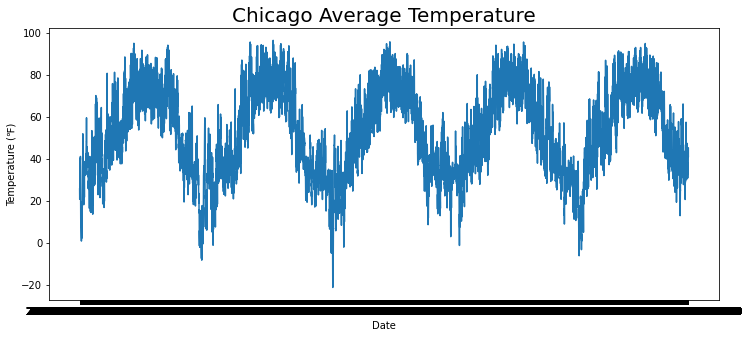

In [ ]:
import matplotlib.pyplot as plt

time = df['datetime'].values
temp = df['temp'].values

plt.figure(figsize=(12, 5))
plt.plot(time, temp)
plt.title('Chicago Average Temperature', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Temperature (℉)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(time, temp, test_size=0.2, random_state=1, shuffle=False)

print(xTrain.shape, xTest.shape)
print(yTrain.shape, yTest.shape)

(35059,) (8765,)
(35059,) (8765,)


In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(yTrain, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set   = windowed_dataset(yTest,  window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss      = tf.keras.losses.Huber(),
    optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9),
    metrics   = ['mae']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
maeScale = (temp.max() - temp.min()) * 10/100
print(maeScale)

11.77


In [ ]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('mae') < maeScale and logs.get('val_mae') < maeScale):
            print(f'\nMAE and Validation MAE reach < 10% of the data scale ({maeScale})')
            # self.model.stop_training = True

stopTraining = stopCallback()

In [ ]:
epoch = 10

history = model.fit(
    train_set,
    epochs          = epoch,
    validation_data = val_set,
    verbose         = 2,
    callbacks       = [stopTraining]
)

Epoch 1/10
350/350 - 56s - loss: 47.3862 - mae: 47.8859 - val_loss: 29.7791 - val_mae: 30.2775 - 56s/epoch - 161ms/step
Epoch 2/10

MAE and Validation MAE reach < 10% of the data scale (11.77)
350/350 - 50s - loss: 9.9427 - mae: 10.4298 - val_loss: 4.0126 - val_mae: 4.4823 - 50s/epoch - 144ms/step
Epoch 3/10

MAE and Validation MAE reach < 10% of the data scale (11.77)
350/350 - 52s - loss: 3.4568 - mae: 3.9264 - val_loss: 3.4588 - val_mae: 3.9379 - 52s/epoch - 149ms/step
Epoch 4/10

MAE and Validation MAE reach < 10% of the data scale (11.77)
350/350 - 50s - loss: 2.7433 - mae: 3.2061 - val_loss: 2.5419 - val_mae: 3.0115 - 50s/epoch - 144ms/step
Epoch 5/10

MAE and Validation MAE reach < 10% of the data scale (11.77)
350/350 - 51s - loss: 2.3551 - mae: 2.8115 - val_loss: 1.7674 - val_mae: 2.2238 - 51s/epoch - 147ms/step
Epoch 6/10

MAE and Validation MAE reach < 10% of the data scale (11.77)
350/350 - 50s - loss: 1.9723 - mae: 2.4192 - val_loss: 1.5977 - val_mae: 2.0536 - 50s/epoch - 

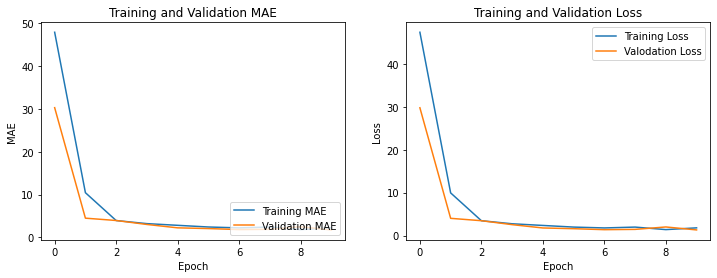

In [ ]:
mae         = history.history['mae']
val_mae     = history.history['val_mae']

loss        = history.history['loss']
val_loss    = history.history['val_loss']

epoch_range = range(epoch)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, mae,     label='Training MAE')
plt.plot(epoch_range, val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss,     label='Training Loss')
plt.plot(epoch_range, val_loss, label='Valodation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()